# EDA after Initial Modelling

This notebook explores the biases in the cleaned  dataset. Because all of the initial models (Linear Regression, Lasso, Ridge, Decision Tree Regressor, Neural Network Regressor showed less than 0.2 of training r2 and test r2, outliers as well as the linear model assumptions are more rigorously examined.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
clean_real_estate = pd.read_csv('../Datasets/cleaned_data.csv')
clean_real_estate = clean_real_estate.reset_index(drop=True)
clean_real_estate.info()

/var/folders/kv/4xjj0g696_lcyc7ms5pdd2t00000gn/T/ipykernel_17396/210281347.py:1: DtypeWarning: Columns (9,10,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  clean_real_estate = pd.read_csv('../Datasets/cleaned_data.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997193 entries, 0 to 997192
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        997193 non-null  int64  
 1   Serial Number     997193 non-null  int64  
 2   List Year         997193 non-null  int64  
 3   Date Recorded     997193 non-null  object 
 4   Town              997193 non-null  object 
 5   Address           997144 non-null  object 
 6   Assessed Value    997193 non-null  float64
 7   Sale Amount       997193 non-null  float64
 8   Sales Ratio       997193 non-null  float64
 9   Property Type     614751 non-null  object 
 10  Residential Type  608889 non-null  object 
 11  Non Use Code      245326 non-null  float64
 12  Assessor Remarks  149858 non-null  object 
 13  OPM remarks       9916 non-null    object 
 14  Location          197691 non-null  object 
 15  Full Address      979476 non-null  object 
 16  latitude          48

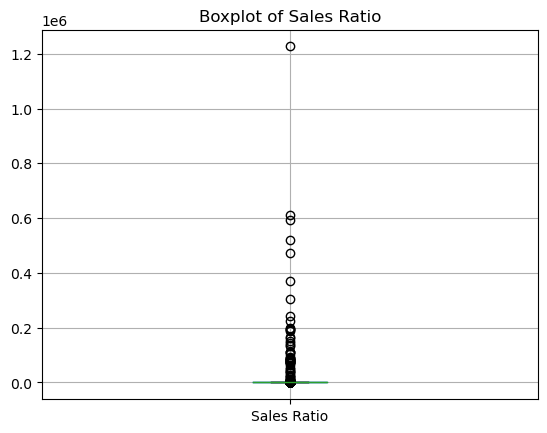

In [37]:
plt.figure()

# Create the boxplot for the "Sales Ratio" column
clean_real_estate.boxplot(column="Sales Ratio")
plt.title("Boxplot of Sales Ratio")

# Display the plot
plt.show()

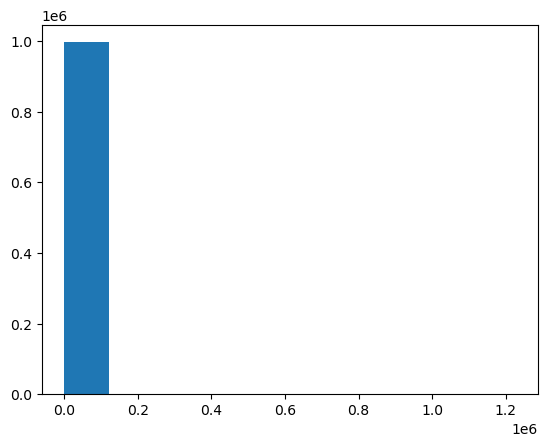

In [38]:
x = clean_real_estate["Sales Ratio"]
plt.figure()
plt.hist(x)
plt.show()

In [43]:
print(f"the mean sales raatio is", clean_real_estate["Sales Ratio"].mean())
print(f"the median sales raatio is", clean_real_estate["Sales Ratio"].median())
print(f"the mean sales raatio is", clean_real_estate["Sales Ratio"].max())


the mean sales raatio is 10.44656875135981
the median sales raatio is 0.6246
the mean sales raatio is 1226420.0


In [44]:
(clean_real_estate[clean_real_estate["Sales Ratio"]>10]).shape[0]/clean_real_estate.shape[0]

0.008989232776403365

In [45]:
crazy_ratio_rows = clean_real_estate[clean_real_estate["Sales Ratio"]>2]

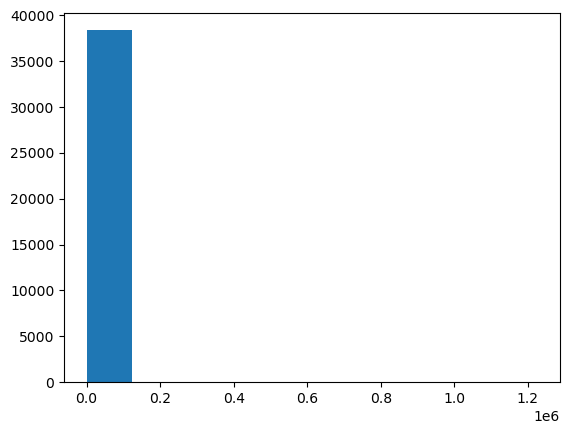

In [46]:
plt.figure()
plt.hist(crazy_ratio_rows["Sales Ratio"])
plt.show()

In [47]:
crazy_ratio_rows

,Unnamed: 0,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Full Address,latitude,longitude,month_recorded,year_recorded
164,164,202000141,2020,2021-03-18,Plymouth,99 EASTVIEW ROAD,34790.0,10000.00,3.4790,Vacant Land,NaN,NaN,NaN,NaN,NaN,"99, Eastview Road",NaN,NaN,3.0,2021.0
2385,2385,200407,2020,2021-04-09,Glastonbury,1862 CHALKER HILL RD,103500.0,45000.00,2.3000,Vacant Land,NaN,NaN,NaN,NaN,NaN,"1862, Chalker Hill Rd",NaN,NaN,4.0,2021.0
4351,4351,20156,2020,2021-09-09,Lebanon,KELLYS COR (103-136),17700.0,7500.00,2.3600,Vacant Land,NaN,NaN,NaN,NaN,NaN,Kellys Cor (103),NaN,NaN,9.0,2021.0
6129,6129,20006,2020,2020-10-28,Colebrook,138 OLD COLEBROOK ROAD,514400.0,100000.00,5.1440,Residential,Single Family,NaN,NaN,NaN,NaN,"138, Old Colebrook Road",NaN,NaN,10.0,2020.0
9651,9651,200351,2020,2021-01-20,Norwich,53 PRENTICE ST #22,22100.0,5405.00,4.0888,Residential,Single Family,NaN,NaN,NaN,NaN,"53, Prentice St",NaN,NaN,1.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997113,461813,1900264,2019,2020-08-27,Wolcott,7PLEASANT ST.,114630.0,23800.00,4.8164,Single Family,Single Family,8.0,estate sale; partial interest,NaN,NaN,"7, Pleasant St., Wolcott, Connecticut, United ...",41.577602,-72.976895,8.0,2020.0
997126,461826,190027,2019,2019-11-19,Wilton,23 COLEY RD,675500.0,309243.39,2.1844,Single Family,Single Family,18.0,NaN,NaN,NaN,"23, Coley Rd, Wilton, Connecticut, United States",41.210204,-73.399581,11.0,2019.0
997128,461828,19241,2019,2020-06-11,Montville,19 MOXLEY RD,37230.0,17000.00,2.1900,NaN,NaN,25.0,SALES RATIO,NaN,NaN,"19, Moxley Rd, Montville, Connecticut, United ...",41.434500,-72.118266,6.0,2020.0
997137,461837,19094,2019,2020-02-27,Stafford,7 SCHOOL ST,93240.0,23000.00,4.0539,Single Family,Single Family,9.0,NaN,NaN,NaN,"7, School St, Stafford, Connecticut, United St...",41.953503,-72.300249,2.0,2020.0


In [48]:
clean_real_estate = clean_real_estate.rename(columns = {'Sales Ratio' : "sales_ratio"})

Although this is an extreme outlier case, more outliers need to be rid of.

In [49]:
iqr_info = clean_real_estate.sales_ratio.quantile([0,0.25,0.5,0.75, 1])
IQR = clean_real_estate.sales_ratio.quantile(0.75) - clean_real_estate.sales_ratio.quantile(0.25)

In [50]:
clean_real_estate.sales_ratio.quantile(0.25)

0.4867

In [51]:
upper_fence = clean_real_estate.sales_ratio.quantile(0.75) + IQR
lower_fence = clean_real_estate.sales_ratio.quantile(0.25) - IQR

In [52]:
print (f"upper:" , upper_fence, "lower:", lower_fence)

upper: 1.08386338 lower: 0.18811831


In [53]:
clean_real_estate = clean_real_estate[~((clean_real_estate["sales_ratio"] > upper_fence) | (clean_real_estate["sales_ratio"] < lower_fence))]


In [54]:
clean_real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853732 entries, 0 to 997192
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        853732 non-null  int64  
 1   Serial Number     853732 non-null  int64  
 2   List Year         853732 non-null  int64  
 3   Date Recorded     853732 non-null  object 
 4   Town              853732 non-null  object 
 5   Address           853722 non-null  object 
 6   Assessed Value    853732 non-null  float64
 7   Sale Amount       853732 non-null  float64
 8   sales_ratio       853732 non-null  float64
 9   Property Type     529969 non-null  object 
 10  Residential Type  525997 non-null  object 
 11  Non Use Code      133415 non-null  float64
 12  Assessor Remarks  97476 non-null   object 
 13  OPM remarks       7731 non-null    object 
 14  Location          171298 non-null  object 
 15  Full Address      846604 non-null  object 
 16  latitude          35

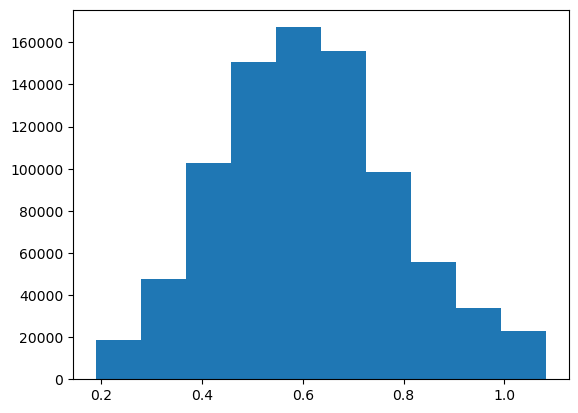

In [56]:
x = clean_real_estate["sales_ratio"]
plt.figure()
plt.hist(x)
plt.show()

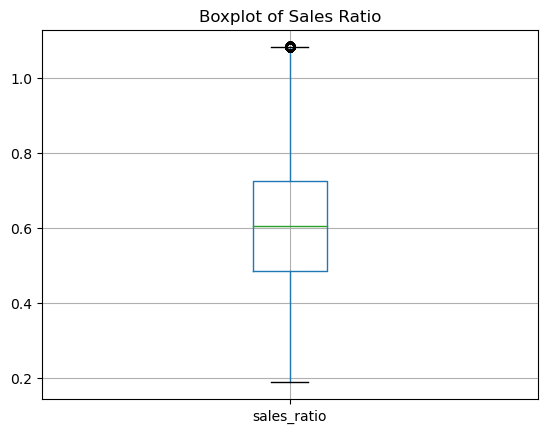

In [57]:
plt.figure()

# Create the boxplot for the "Sales Ratio" column
clean_real_estate.boxplot(column="sales_ratio")
plt.title("Boxplot of Sales Ratio")

# Display the plot
plt.show()

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact

# Assuming you have loaded your data into a DataFrame named clean_real_estate

# Filter out rows with missing 'Property Type' and 'Sale Amount'
clean_real_estate = clean_real_estate.dropna(subset=['Property Type', 'Sale Amount'])

# Create a new DataFrame for median prices by property type and year
median_prices = clean_real_estate.groupby(['year_recorded', 'Property Type'])['Sale Amount'].median().reset_index()

# Get unique years in your data
available_years = clean_real_estate['year_recorded'].unique()

# Create an interactive function to update the bar plot
@interact(year=widgets.IntSlider(min=min(available_years), max=max(available_years), step=1, value=min(available_years))
)
def update_plot(year):
    plt.figure(figsize=(12, 6))
    data_to_plot = median_prices[median_prices['year_recorded'] == year]
    sns.barplot(data=data_to_plot, x='Property Type', y='Sale Amount')
    plt.title(f'Median Price by Property Type in {year}')
    plt.xticks(rotation=90)
    plt.show()


interactive(children=(IntSlider(value=1999, description='year', max=2021, min=1999), Output()), _dom_classes=(…

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact

# Assuming you have loaded your data into a DataFrame named clean_real_estate

# Filter out rows with missing 'Property Type' and 'Sale Amount'
clean_real_estate = clean_real_estate.dropna(subset=['Property Type', 'Sale Amount'])

# Get unique property types and years in your data
property_types = clean_real_estate['Property Type'].unique()
years = clean_real_estate['year_recorded'].unique()

# Create an interactive function to update the bar plot
@interact(property_type=widgets.Dropdown(options=property_types, description='Property Type:'))
def update_plot(property_type):
    plt.figure(figsize=(12, 6))
    data_to_plot = clean_real_estate[clean_real_estate['Property Type'] == property_type]
    sns.barplot(data=data_to_plot, x='year_recorded', y='Sale Amount')
    plt.title(f'Sales Prices for {property_type} Over the Years')
    plt.xticks(rotation=90)
    plt.show()


interactive(children=(Dropdown(description='Property Type:', options=('Commercial', 'Residential', 'Vacant Lan…